## Deep Learning

In [1]:
!pip install torch torchvision

In [2]:
# Importing torch and torchvision
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# Hyperparameters

n_epochs = 3 # Number of Epochs
batch_size_train = 64 # Training Batch Size
batch_size_test = 1000 # Testing Batch Size
learning_rate = 0.01 # Learning Rate for Gradient Descent ( Hyperparameter )
momentum = 0.5
log_interval = 10

random_seed = 1 
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
# Lets look into test_loader Dataloader
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [6]:
# let's see what one test data batch consists of.
example_data.shape

torch.Size([1000, 1, 28, 28])

This means we have 1000 examples of 28x28 pixels in grayscale (which means no rgb channels, hence the one).

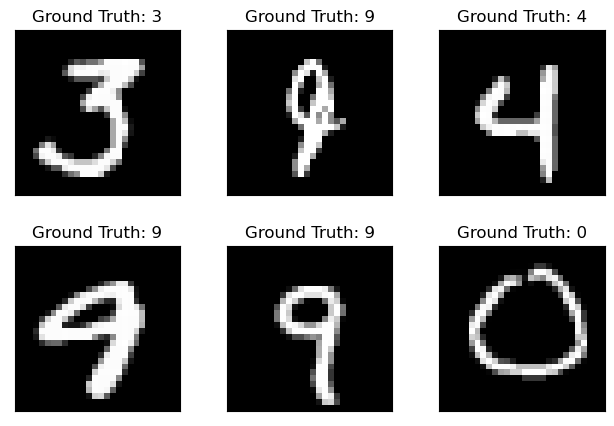

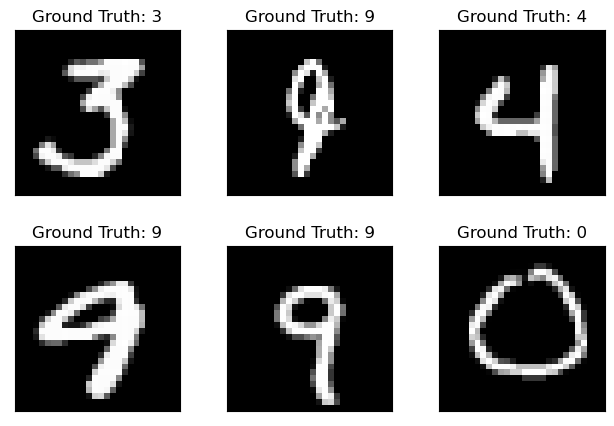

In [7]:
# plot some of them using matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

### 4. Defining the CNN architecture

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # TODO:  Implement the network by following the above definitions.
        # Layer 1
        self.conv1= nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        
        # Layer 2
        self.conv2= nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.drop= nn.Dropout(p=0.5)

        # layer3
        self.fc1 = nn.Linear(1280, 50)

        # layer 4
        self.fc2= nn.Linear(50, 10)

        # output layer
        self.log_softmax= nn.LogSoftmax(dim=1)
        

    def forward(self, x):
        # TODO: return F.log_softmax(x)
        x= self.conv1(x)
        x= self.pool(x)
        x= self.relu(x)
        
        x= self.conv2(x)
        x= self.drop(x)

        x= x.view(-1, 1280) # reshaping the tensor
        x= self.fc1(x)
        x= self.relu(x)

        x= self.fc2(x)
        x= self.log_softmax(x)
        return(x)

In [9]:
! pip install torch-summary

In [10]:
from torchsummary import summary

model= Net()
summary(model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 10, 24, 24]          260
├─MaxPool2d: 1-2                         [-1, 10, 12, 12]          --
├─ReLU: 1-3                              [-1, 10, 12, 12]          --
├─Conv2d: 1-4                            [-1, 20, 8, 8]            5,020
├─Dropout: 1-5                           [-1, 20, 8, 8]            --
├─Linear: 1-6                            [-1, 50]                  64,050
├─ReLU: 1-7                              [-1, 50]                  --
├─Linear: 1-8                            [-1, 10]                  510
├─LogSoftmax: 1-9                        [-1, 10]                  --
Total params: 69,840
Trainable params: 69,840
Non-trainable params: 0
Total mult-adds (M): 0.53
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.27
Estimated Total Size (MB): 0.32


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 10, 24, 24]          260
├─MaxPool2d: 1-2                         [-1, 10, 12, 12]          --
├─ReLU: 1-3                              [-1, 10, 12, 12]          --
├─Conv2d: 1-4                            [-1, 20, 8, 8]            5,020
├─Dropout: 1-5                           [-1, 20, 8, 8]            --
├─Linear: 1-6                            [-1, 50]                  64,050
├─ReLU: 1-7                              [-1, 50]                  --
├─Linear: 1-8                            [-1, 10]                  510
├─LogSoftmax: 1-9                        [-1, 10]                  --
Total params: 69,840
Trainable params: 69,840
Non-trainable params: 0
Total mult-adds (M): 0.53
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.27
Estimated Total Size (MB): 0.32

In [11]:
# Initialize the Network
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
# Print out the model 
network


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

### 5. Training the model

In [12]:
# Logging to save the losses later for plotting 
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [13]:
pwd

'C:\\Users\\suman\\Homework 3'

In [14]:
# Creating a results directory in the Files sections
import os 

os.mkdir("C:\\Users\\suman\\Homework 3\\content")
os.mkdir("C:\\Users\\suman\\Homework 3\\content\\results")

In [15]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad() # Using the context manager no_grad() we can avoid storing the computations done producing the output of our network in the computation graph.
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'C:\\Users\\suman\\Homework 3\\content\\results\\model.pth') # create the results directory 
      torch.save(optimizer.state_dict(), 'C:\\Users\\suman\\Homework 3\\content\\results\\optimizer.pth')

### 6. Testing the model

In [16]:
def test():
  # TODO
  network.eval()
  test_loss = 0
  correct_var = 0
  counter = 0
  test_accs = []
  with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
      output = network(data)
      loss = F.nll_loss(output, target)
      test_loss += loss
      pred = np.argmax(output) 
      correct_var += len(np.where(pred == target))
      counter += 1
  average_test_loss = test_loss/ (counter*batch_size_test)
  test_losses.append(average_test_loss)
  test_acc = 100* correct_var/(counter*batch_size_test)
  test_accs.append(test_acc)
  print( '\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct_var, len(test_loader.dataset), 100. * correct_var / len(test_loader.dataset)))

In [17]:
# Time to run the training! We'll manually add a test() call before we 
# loop over n_epochs to evaluate our model with randomly initialized parameters."""

test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()


Test set: Avg. loss: 23.0810, Accuracy: 10/10000 (0%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302101
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.283072
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.169330
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.965137
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.633338
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.288252
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.986947
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.847704
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.708231
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.690231
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.574017
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.611860
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.466362
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.510635
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.241293
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.445652
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.535560
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.505238
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.408892
Train Epoch: 1 [12160/6

In [18]:
print(len(test_counter))
print(len(test_losses))

4
4


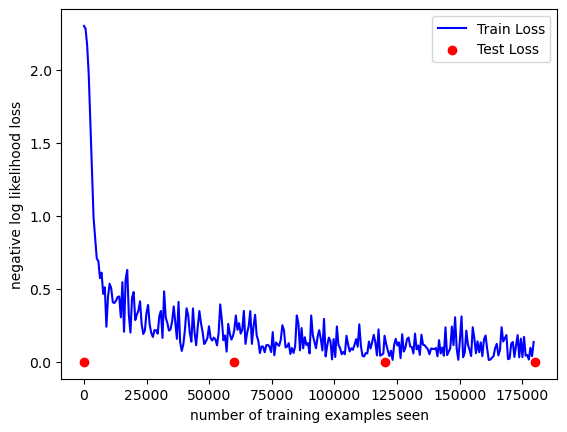

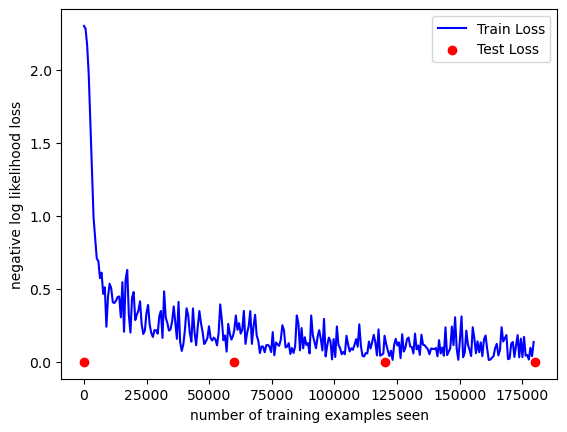

In [19]:
# Evaluating the Model's Performance

""" With just 3 epochs of training we already managed to 
achieve 97% accuracy on the test set! We started 
out with randomly initialized parameters and as 
expected only got about 10% accuracy on the test set before starting the training. """

# Let's plot our training curve.
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [20]:
with torch.no_grad():
  output = network(example_data)

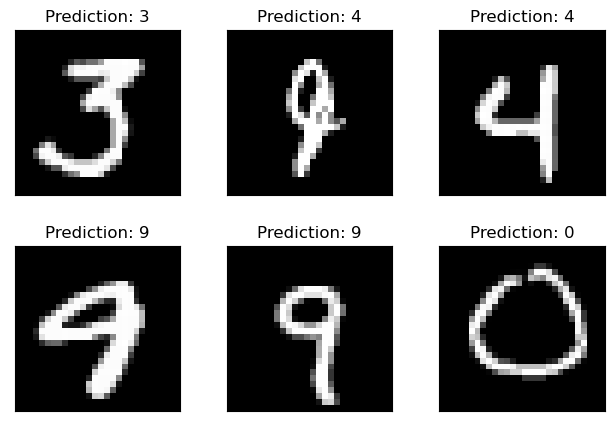

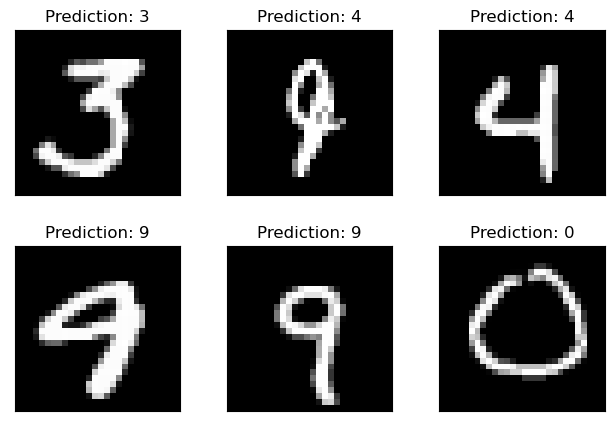

In [21]:
# Visualization of the Predicted Results
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [22]:
# Continued Training from Checkpoints 

""" Now let's continue training the network, or rather see how we can continue training from the state_dicts we saved during 
our first training run. We'll initialize a new set of network and optimizers. """

continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)


In [23]:
""" Using .load_state_dict() we can now load the internal state of the network and 
optimizer when we last saved them. """

network_state_dict = torch.load("C:\\Users\\suman\\Homework 3\\content\\results\\model.pth")
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load("C:\\Users\\suman\\Homework 3\\content\\results\\optimizer.pth")
continued_optimizer.load_state_dict(optimizer_state_dict)

In [24]:
"""Again running a training loop should immediately pick up the training where we left it. 
To check on that let's simply use the same lists as before to keep track of the loss values. """

for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.070976
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.053890
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.093289
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.161857
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.333456
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.040650
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.122329
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.076506
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.100042
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.050293
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.117784
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.107344
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.097133
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.089619
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.080500
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.044011
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.076004
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.114775
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.083859
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.018540
Train Epoch: 4 [12800/60000 (

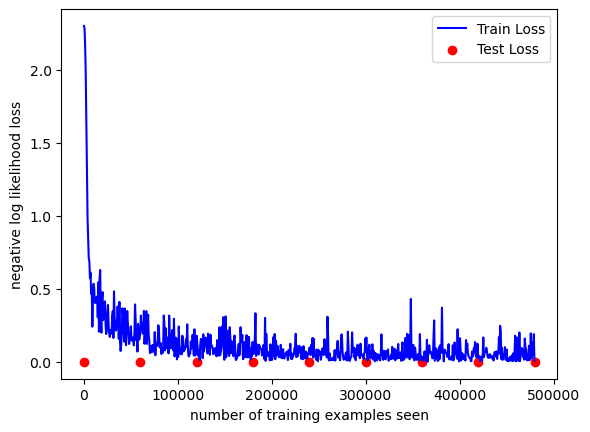

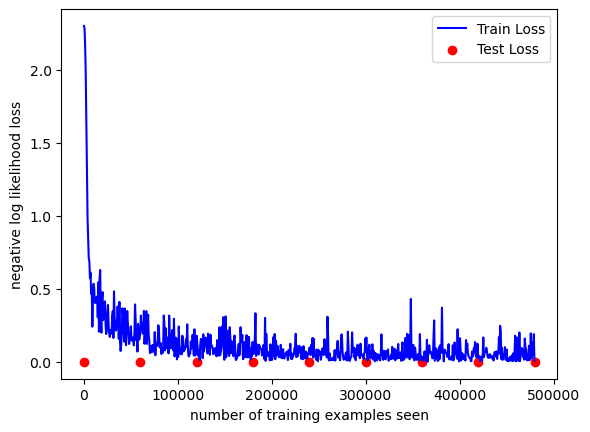

In [25]:
# Let's visualize this to further inspect the training progress.

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

### Conclusion


TODO: 

**Explore the effect of increasing or decreasing the number of channels in convolutional layers.**

The ability of the network to record complex features increased as I raised the number of channels, but the expense of computation during training and inference increased because there were more parameters. Given that the algorithm is more adept at recalling the training data, overfitting to the training data is an option. greater precision on datasets that are more challenging and call for the network to acquire abstract characteristics.

Due to the model's restricted number of input parameters, a decrease in the number of channels affected how well the network could capture complex features. Costs for training and inference are decreased. The algorithm may underfit to training data because it is less adept at spotting patterns in the data.Since the model is less likely to overfit to the training data, there is better adaptation to novel data.


**Try doubling or halving the number of channels in each layer, and observe the effect on training and validation accuracy.**

The data show that increasing the number of channels by two results in marginally higher training and validation accuracy compared to the original model. The model dimension increases noticeably as a result.

On the other hand, halving the number of channels results in a smaller model but a slight decline in the original model's training and validation accuracy.

Increasing or reducing the number of channels in each convolutional layer can generally have different effects on the model's performance, depending on the specific dataset and design. To choose the optimal number of channels, it is critical to try out various numbers and use a validation group.

**Adjust the learning rate and batch size hyperparameters to see how this affects model performance.**

A learning rate that is too high can cause overshooting of the optimal parameters, whereas a learning rate that is too low can cause slow convergence or getting stuck in a local minimum. While a reduced batch size can produce high variance in the gradients and quicker convergence, a larger group size can produce high bias in the gradients and bad generalization.

**In this final section, you will summarize the results of the project, discuss any challenges or interesting findings, and suggest areas for future improvement.**

In this research, we examined the effects of various hyperparameters, such as the number of channels, learning rate, and group size, on the success of a CNN model on the MNIST dataset. We experimented with altering the hyperparameters for learning rate and group size as well as doubling or reducing the quantity of channels in each convolutional layer.

One of the project's difficulties was determining the optimal values for the hyperparameters. Because they can vary depending on the dataset and model architecture, the best values must be established through trial and confirmation.

The team made the interesting finding that performance is not always enhanced by adding channels to each convolutional layer.

In the future, we can experiment with additional hyperparameters like dropout and weight decline as well as more complex model architectures and datasets. We can try out different activation functions in different layers and see whether the new models outperforms our previous best models. We can also use more advanced optimization techniques like variable learning rates and momentum to improve model performance. In the end, there is a lot of space for advancement in the area of deep learning, and we can keep pushing the envelope of what is feasible using these powerful tools.
